In [148]:
import pandas as pd
import numpy as np
import os 
import statistics 
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [149]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')


In [150]:
print(updatedchoicedata)

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    595727bd7c76640001aa8f6e                 0                1.0   
4    595727bd7c76640001aa8f6e                 1                1.0   
..                        ...               ...                ...   
196  641361334c91a0c6ff4c5b79                 1                1.0   
197  641361334c91a0c6ff4c5b79                 2                1.0   
198  641a3df3c874807a1a8734bc                 0                1.0   
199  641a3df3c874807a1a8734bc                 1                1.0   
200  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0              4.0          5.0             5.0  0.833333     -0.5           1

In [151]:
anovachoice = pg.rm_anova(data=updatedchoicedata, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [152]:
print(anovachoice)

             Source        SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.073489    2  0.036745  1.398559  0.250587   0.250683   
1             Error  3.468066  132  0.026273       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.002149  0.874549      False  0.856553  0.006524  
1       NaN       NaN        NaN       NaN       NaN  


In [153]:
anovasalience = pg.rm_anova(data=updatedchoicedata, dv='salience_mean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovasalience)

             Source         SS   DF         MS          F         p-unc  \
0  condition_recode  41.450249    2  20.725124  43.389805  3.291757e-15   
1             Error  63.049751  132   0.477650        NaN           NaN   

      p-GG-corr       ng2       eps sphericity   W-spher   p-spher  
0  3.835181e-15  0.189288  0.994816       True  0.994789  0.843842  
1           NaN       NaN       NaN        NaN       NaN       NaN  


In [154]:
anovastress = pg.rm_anova(data=updatedchoicedata, dv='recoded_stress', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovastress)

             Source          SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode   18.300995    2  9.150498  9.751416  0.000112   0.000139   
1             Error  123.865672  132  0.938376       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.020236  0.966373       True  0.965203  0.316303  
1       NaN       NaN        NaN       NaN       NaN  


In [155]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)


In [156]:
rej_accstressttest = ttest(rej['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d     BF10  power
T-test -4.12   66        less    0.0  [-inf, -0.44]     0.35  392.838   0.89


In [157]:
rej_neustressttest = ttest(rej['recoded_stress'], neu['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_neustressttest)

           T  dof alternative  p-val          CI95%  cohen-d  BF10  power
T-test -2.29   66        less   0.01  [-inf, -0.11]     0.17  3.05   0.41


In [158]:
neu_accstressttest = ttest(neu['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(neu_accstressttest)

          T  dof alternative  p-val         CI95%  cohen-d   BF10  power
T-test -2.3   66        less   0.01  [-inf, -0.1]     0.17  3.133   0.41


In [159]:
rej_accsaliencettest = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -9.29   66        less    0.0  [-inf, -0.91]     1.24  1.134e+11    1.0


In [160]:
rej_neusaliencettest = ttest(rej['salience_mean'], neu['salience_mean'], paired=True, alternative='less').round(2)
print(rej_neusaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d     BF10  power
T-test -4.59   66        less    0.0  [-inf, -0.34]     0.57  1825.27    1.0


In [161]:
neu_accsaliencettest = ttest(neu['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(neu_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d      BF10  power
T-test -4.74   66        less    0.0  [-inf, -0.38]     0.58  3004.275    1.0


In [162]:
print(rej)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
62  63eac31811a6da58d4f32d76                 1                1.0   
63  63fac97f0d4e8f6bfd753d90                 1                1.0   
64  64023a98627b1116180dff0b                 1                1.0   
65  641361334c91a0c6ff4c5b79                 1                1.0   
66  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0             1.5          4.5             4.5  1.000000     -0.5           1  
1          

In [163]:
print(len(rej))
print(len(neu))
print(len(acc))

67
67
67


In [164]:
mostaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==1].reset_index(drop=True)
leastaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==0].reset_index(drop=True)

In [165]:
print(len(mostaffectedpps))

120


In [166]:
mostaffectedanovachoice = pg.rm_anova(data=mostaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [167]:
print(mostaffectedanovachoice)

             Source        SS  DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.025705   2  0.012853  0.408484  0.666071   0.650227   
1             Error  2.454188  78  0.031464       NaN       NaN        NaN   

        ng2      eps sphericity   W-spher   p-spher  
0  0.001398  0.92476       True  0.918638  0.199408  
1       NaN      NaN        NaN       NaN       NaN  


In [168]:
leastaffectedanovachoice = pg.rm_anova(data=leastaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [169]:
print(leastaffectedanovachoice)

             Source        SS  DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.056029   2  0.028014  1.448581  0.244225   0.244465   
1             Error  1.005634  52  0.019339       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.003816  0.664269      False  0.494585  0.000151  
1       NaN       NaN        NaN       NaN       NaN  


In [170]:
#proportion of self-choice in neutral condition
rejchoice_mean = rej['choice'].mean()
rejchoice_std = rej['choice'].std()
print('rejchoice_mean')
print(rejchoice_mean)
print('rejchoice_std')
print(rejchoice_std)

rejchoice_mean
0.4305744007236545
rejchoice_std
0.4117122529795472


In [171]:
accchoice_mean = acc['choice'].mean()
accchoice_std = acc['choice'].std()
print('accchoice_mean')
print(accchoice_mean)
print('accchoice_std')
print(accchoice_std)

accchoice_mean
0.3841926729986432
accchoice_std
0.3990062494947449


In [172]:
neuchoice_mean = neu['choice'].mean()
neuchoice_std = neu['choice'].std()
print('neuchoice_mean')
print(neuchoice_mean)
print('neuchoice_std')
print(neuchoice_std)

neuchoice_mean
0.4017412935323383
neuchoice_std
0.43385879493495255


In [188]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
brcs = pd.read_csv('%s/scoring/brcs.csv'%(current_dir))
erq = pd.read_csv('%s/scoring/erq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
pss = pd.read_csv('%s/scoring/pss.csv'%(current_dir))
rsq = pd.read_csv('%s/scoring/rsq.csv'%(current_dir))
rr = pd.read_csv('%s/scoring/rr.csv'%(current_dir))
mspss = pd.read_csv('%s/scoring/mspss.csv'%(current_dir))

In [174]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']
print(len(rejchoice))
print(len(accchoice))
print(len(neuchoice))
print(len(aq))
print(len(ntbs))
print(len(mspss))

67
67
67
67
67
67


In [175]:
print(aq)

                 Prolific_ID    AQ
0   568d286ab5a2c2000cb6a91c  24.0
1   595727bd7c76640001aa8f6e  33.0
2   5a4636c92f91ec0001dcba07  32.0
3   5ad2c8334d061300011b1985  11.0
4   5adef850eb60400001539109  21.0
..                       ...   ...
62  63eac31811a6da58d4f32d76  16.0
63  63fac97f0d4e8f6bfd753d90  30.0
64  64023a98627b1116180dff0b  30.0
65  641361334c91a0c6ff4c5b79  10.0
66  641a3df3c874807a1a8734bc  20.0

[67 rows x 2 columns]


In [176]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']

rejstress = rej['recoded_stress']
accstress = acc['recoded_stress']
neustress = neu['recoded_stress']

rejsalience = rej['salience_mean']
accsalience = acc['salience_mean']
neusalience = neu['salience_mean']

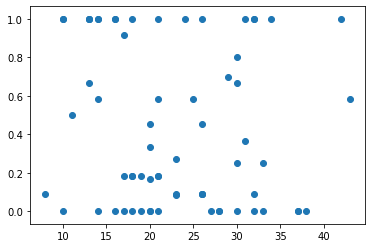

[[68.95251018 -0.44580952]
 [-0.44580952  0.16950698]]
Spearmans correlation: -0.165
p value: 0.1814
Accept null hypothesis that the means are equal.


In [177]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],rejchoice)
pyplot.show()
covariance = cov(aq['AQ'],rejchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

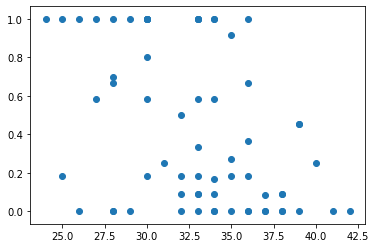

[[17.30710086 -0.72841474]
 [-0.72841474  0.16950698]]
Spearmans correlation: -0.413
p value: 0.0005
Reject the null hypothesis that the means are equal.


In [178]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],rejchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rejchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

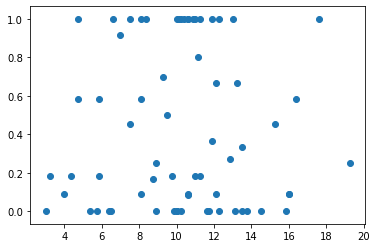

[[1.24124689e+01 4.17313399e-03]
 [4.17313399e-03 1.69506979e-01]]
Spearmans correlation: -0.004
p value: 0.9760
Accept null hypothesis that the means are equal.


In [179]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],rejchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],rejchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


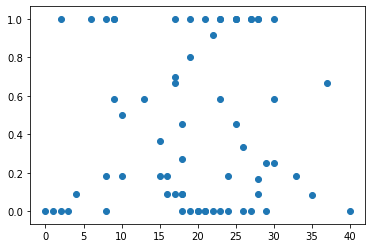

[[83.55540479  0.18047401]
 [ 0.18047401  0.16950698]]
Spearmans correlation: 0.066
p value: 0.5942
Accept null hypothesis that the means are equal.


In [180]:
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],rejchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

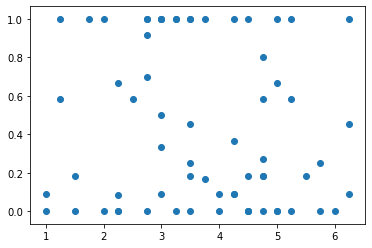

[[ 1.90326775 -0.06620667]
 [-0.06620667  0.16950698]]
Spearmans correlation: -0.102
p value: 0.4130
Accept null hypothesis that the means are equal.


In [181]:
# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


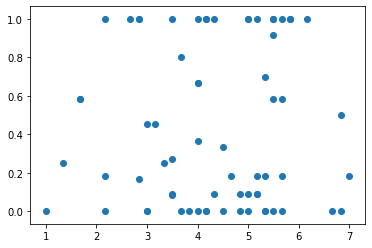

[[1.91327454 0.01554698]
 [0.01554698 0.16950698]]
Spearmans correlation: 0.030
p value: 0.8068
Accept null hypothesis that the means are equal.


In [182]:
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


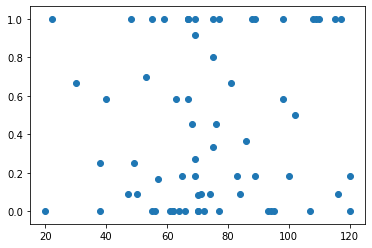

[[5.49665762e+02 9.27326864e-01]
 [9.27326864e-01 1.69506979e-01]]
Spearmans correlation: 0.105
p value: 0.3958
Accept null hypothesis that the means are equal.


In [183]:
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],rejchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

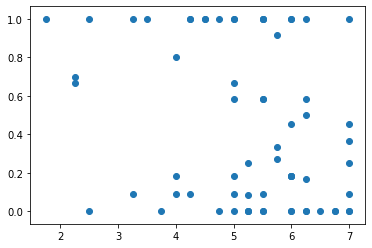

[[ 1.64009498 -0.15361365]
 [-0.15361365  0.16950698]]
Spearmans correlation: -0.265
p value: 0.0304
Reject the null hypothesis that the means are equal.


In [190]:
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],rejchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],rejchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

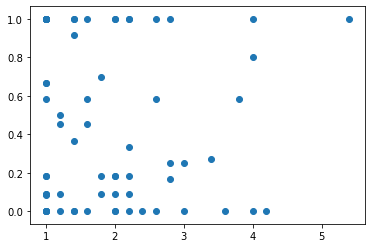

[[ 1.01054726e+00 -9.96395433e-05]
 [-9.96395433e-05  1.69506979e-01]]
Spearmans correlation: -0.046
p value: 0.7130
Accept null hypothesis that the means are equal.


In [191]:
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

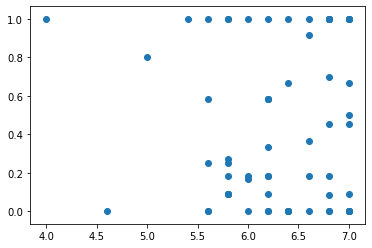

[[0.38588874 0.00255616]
 [0.00255616 0.16950698]]
Spearmans correlation: 0.010
p value: 0.9340
Accept null hypothesis that the means are equal.


In [192]:
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

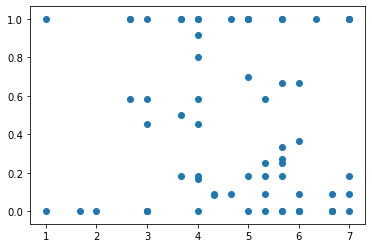

[[ 2.32257902 -0.06640957]
 [-0.06640957  0.16950698]]
Spearmans correlation: -0.114
p value: 0.3581
Accept null hypothesis that the means are equal.


In [193]:
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

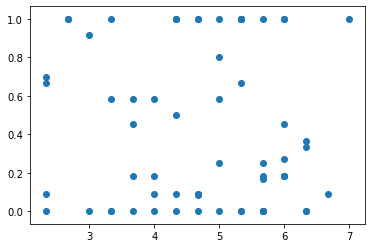

[[ 1.43213227 -0.03292045]
 [-0.03292045  0.16950698]]
Spearmans correlation: -0.040
p value: 0.7463
Accept null hypothesis that the means are equal.


In [194]:
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

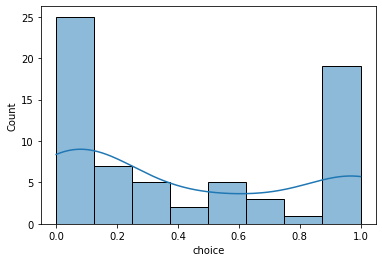

In [195]:
sns.histplot(data= rejchoice, kde=True)

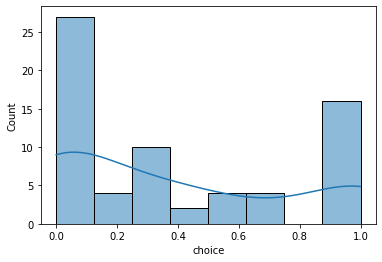

In [196]:
sns.histplot(data= accchoice, kde=True)

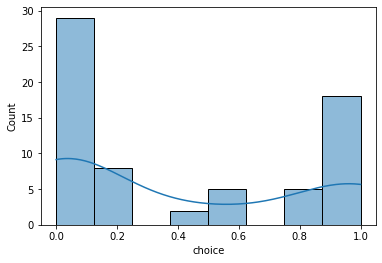

In [197]:
sns.histplot(data= neuchoice, kde=True)

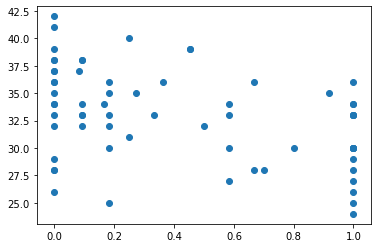

[[ 0.16950698 -0.72841474]
 [-0.72841474 17.30710086]]
Spearmans correlation: -0.413
p value: 0.0005
Reject the null hypothesis that the means are equal.


In [198]:
# prop_choicerej // ntbs
pyplot.scatter(rejchoice, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejchoice, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

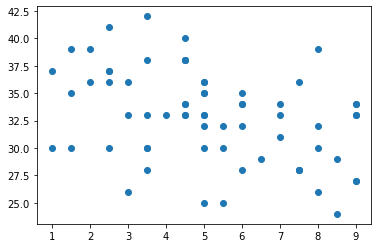

[[ 5.25011307 -3.673564  ]
 [-3.673564   17.30710086]]
Spearmans correlation: -0.402
p value: 0.0007
Reject the null hypothesis that the means are equal.


In [199]:
# rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(rejstress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



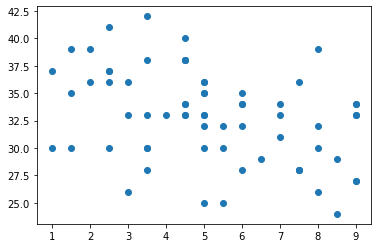

[[ 5.25011307 -3.673564  ]
 [-3.673564   17.30710086]]
Pearsons correlation: -0.385
p value: 0.0013
Reject the null hypothesis that the means are equal.


In [200]:
#rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(rejstress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

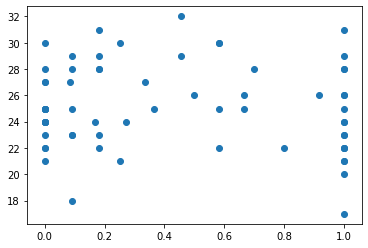

[[ 0.16950698 -0.1257216 ]
 [-0.1257216  10.22795115]]
Spearmansr correlation: -0.049
p value: 0.6951
Accept null hypothesis that the means are equal.


In [137]:
# prop_choicerej // rr
pyplot.scatter(rejchoice, rr['RR_score'])
pyplot.show()
covariance = cov(rejchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

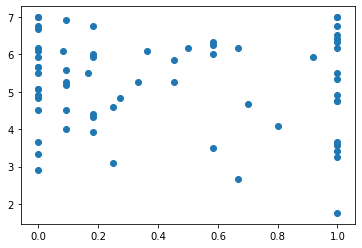

[[ 0.16950698 -0.050455  ]
 [-0.050455    1.54231054]]
Spearmansr correlation: -0.063
p value: 0.6153
Accept null hypothesis that the means are equal.


In [138]:
# prop_choicerej // mspss
pyplot.scatter(rejchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(rejchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')